Sigmoid activation
In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

Math

S(z)=1/1+e−z
Note

s(z) = output between 0 and 1 (probability estimate)
z = input to the function (your algorithm’s prediction e.g. mx + b)
e = base of natural log
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

In [1]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

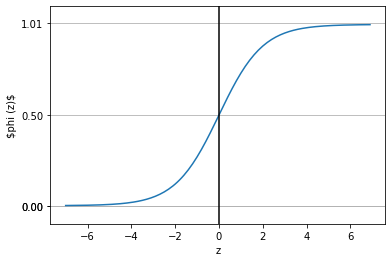

In [3]:
import matplotlib.pyplot as plt
import numpy as np
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('\$phi (z)$')
plt.yticks([0.0,0.5,0,1.01])
ax= plt.gca()
ax.yaxis.grid(True)
plt.show()

Decision boundary
Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

    p≥0.5,class=1
    p<0.5,class=0
For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.

In [4]:
def cost_1(z):
    return - np.log(sigmoid(z))

In [6]:
def cost_0(z):
    return - np.log(1-sigmoid(z))

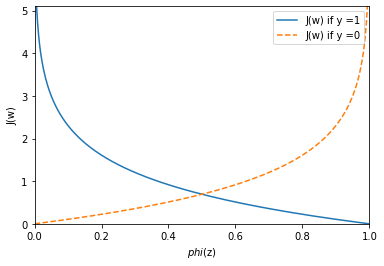

In [7]:
z = np.arange(-10,10,0.1)
phi_z= sigmoid(z)
c1= [cost_1(x) for x in z]
plt.plot(phi_z, c1 , label= 'J(w) if y =1')
c0= [cost_0(x) for x in z]
plt.plot(phi_z, c0 , label= 'J(w) if y =0', linestyle= '--')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

We can see that the cost approaches 0 if we correctly predict that sample belongs to class 1
Similarly same happens for class 0. If we predict the wrong the cost infinity.
So the wrong predictions cost sigficantly large

In [8]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y=iris.target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

In [10]:
X_train_01_subset = X_train[(y_train ==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train ==0)|(y_train==1)]

when we fit a logistic regression model, we have to keep in mind that it only works  for binary 
classification tasks.

In [13]:
from sklearn.linear_model import LogisticRegression
lrgd = LogisticRegression( random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

C:\Users\tt0342\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



def plot_decision_regions(X, y , classifier, test_idx =None, resolution=0.02):
    
    
    # setup marker colors map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen',' gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl,1], alpha =0.8, c = colors[idx],
                   marker = markers[idx], label=cl,
                   edgecolor='black')
    
    #highlight test samples
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c = '',
                   marker = 'o', alpha=1 ,label='test_set',
                   edgecolor='black', linewidth=1)

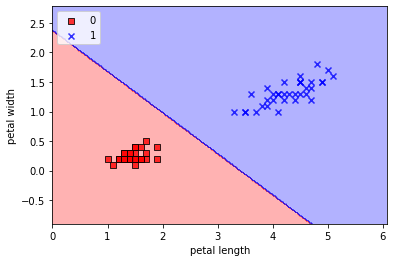

In [15]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)
lr = LogisticRegression( random_state=1)
lr.fit(X_train_sd,y_train)

C:\Users\tt0342\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tt0342\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

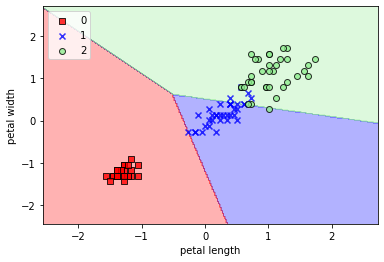

In [21]:
plot_decision_regions(X=X_train_sd, y=y_train,classifier=lr)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [22]:
X_test_std = sc.transform(X_test)
lr.predict_proba(X_test_std [:3,:])

array([[1.46886819e-03, 2.45890455e-01, 7.52640677e-01],
       [7.96710401e-01, 2.02086532e-01, 1.20306706e-03],
       [8.12605897e-01, 1.86729710e-01, 6.64392836e-04]])

the highest value for the first sample is class 3

In [24]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)